In [1]:
import processing

In [2]:
import classifier_loop

In [3]:
import pandas as pd

In [4]:
import datetime

In [5]:
#Start by loading both the projects and outcomes csvs into pandas dataframes

In [6]:
pr_df = processing.form_dataset(r"C:\Users\User\AppData\Local\Programs\Python\Python36\projects.csv")

LoadedC:\Users\User\AppData\Local\Programs\Python\Python36\projects.csv


In [7]:
out_df = processing.form_dataset(r"C:\Users\User\AppData\Local\Programs\Python\Python36\outcomes.csv")

LoadedC:\Users\User\AppData\Local\Programs\Python\Python36\outcomes.csv


In [8]:
#Begin data exploration by showing summary statistics and headers

In [9]:
data_dictionary_out = processing.exploration(out_df)

In [10]:
data_dictionary_pr = processing.exploration(pr_df)

In [11]:
data_dictionary_out["Summary Information"]

,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,439487.00000,524928.000000,524928.000000
mean,52.92709,0.777339,4.361290
std,35.71410,2.227933,5.668748
min,0.00000,0.000000,0.000000
25%,25.00000,0.000000,1.000000
50%,50.00000,0.000000,3.000000
75%,83.00000,0.000000,5.000000
max,100.00000,151.000000,304.000000


In [12]:
data_dictionary_pr["Summary Information"]

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached
count,6.213620e+05,664098.000000,664098.000000,664094.000000,629016.000000,6.640980e+05,6.640980e+05,663952.000000
mean,2.608577e+11,37.240948,-93.344760,52926.452644,27.495822,5.420415e+02,6.447128e+02,97.233547
std,1.589754e+11,4.668155,17.761908,31193.738658,8.663046,1.267738e+04,1.545863e+04,2283.327661
min,1.000050e+10,18.249140,-176.634989,410.000000,9.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.000230e+11,34.038082,-112.003213,27589.000000,17.000000,2.672000e+02,3.175000e+02,22.000000
50%,2.615730e+11,37.662476,-87.681219,50702.000000,30.000000,4.110000e+02,4.878400e+02,30.000000
75%,3.704720e+11,40.758827,-79.193091,85043.000000,35.000000,5.864900e+02,6.963875e+02,100.000000
max,6.100009e+11,67.258157,-66.628036,99950.000000,35.000000,1.025002e+07,1.250002e+07,999999.000000


In [13]:
data_dictionary_out["Column Names"]

['projectid',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count']

In [14]:
data_dictionary_pr["Column Names"]

['projectid',
 'teacher_acctid',
 'schoolid',
 'school_ncesid',
 'school_latitude',
 'school_longitude',
 'school_city',
 'school_state',
 'school_zip',
 'school_metro',
 'school_district',
 'school_county',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'fulfillment_labor_materials',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'date_posted']

In [15]:
#Drop rows that are not between 2011 and 2013

In [16]:
drop_list = ['date_posted']

In [17]:
pr_df['date_posted'] = pd.to_datetime(pr_df['date_posted'])

In [18]:
target_time = datetime.date(2011, 1, 1)

In [19]:
pr_df = processing.processing_drop(pr_df, drop_list, 'greater', target_time)

In [20]:
target_time = datetime.date(2013, 12, 31)

In [21]:
pr_df = processing.processing_drop(pr_df, drop_list, 'lesser', target_time)

In [22]:
#Join dataframes on projectid

In [23]:
main_df = pr_df.merge(right = out_df, how ='inner', on ='projectid')

In [24]:
data_dictionary = processing.exploration(main_df)

In [25]:
data_dictionary["Summary Information"]

,school_ncesid,school_latitude,school_longitude,school_zip,fulfillment_labor_materials,total_price_excluding_optional_support,total_price_including_optional_support,students_reached,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
count,3.282930e+05,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353151.000000,353050.000000,296892.000000,306905.000000,306905.000000
mean,2.503127e+11,36.868563,-95.398318,56301.763713,32.220311,531.372372,625.143964,94.187169,51.768963,1.215979,4.718209
std,1.648173e+11,4.927417,18.118360,31043.523511,2.484309,844.069364,993.022780,156.987405,34.685536,2.672419,6.087815
min,1.000050e+10,18.249140,-171.690554,410.000000,30.000000,37.030000,43.560000,1.000000,0.000000,0.000000,0.000000
25%,6.372301e+10,33.916387,-117.246823,29388.000000,30.000000,288.750000,339.710000,23.000000,25.000000,0.000000,1.000000
50%,2.400090e+11,36.675826,-89.886438,60613.000000,30.000000,427.270000,502.670000,31.000000,50.000000,0.000000,3.000000
75%,3.904440e+11,40.680488,-80.761902,90007.000000,35.000000,606.720000,713.790000,100.000000,80.000000,2.000000,6.000000
max,6.100008e+11,67.258157,-66.628036,99926.000000,35.000000,139725.410000,164382.840000,12143.000000,100.000000,151.000000,304.000000


In [26]:
data_dictionary["Column Names"]

['projectid',
 'teacher_acctid',
 'schoolid',
 'school_ncesid',
 'school_latitude',
 'school_longitude',
 'school_city',
 'school_state',
 'school_zip',
 'school_metro',
 'school_district',
 'school_county',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'secondary_focus_subject',
 'secondary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'fulfillment_labor_materials',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'date_posted',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus

In [27]:
#Drop rows unnecessary to our analysis

In [28]:
drop_list = [
 'secondary_focus_subject',
 'secondary_focus_area',
 'school_ncesid',
 'school_metro'
]

In [29]:
main_df = main_df.drop(columns = drop_list)

In [30]:
#Find nulls

In [31]:
main_df.isnull().sum()

projectid                                             0
teacher_acctid                                        0
schoolid                                              0
school_latitude                                       0
school_longitude                                      0
school_city                                           0
school_state                                          0
school_zip                                            0
school_district                                     429
school_county                                         0
school_charter                                        0
school_magnet                                         0
school_year_round                                     0
school_nlns                                           0
school_kipp                                           0
school_charter_ready_promise                          0
teacher_prefix                                        0
teacher_teach_for_america                       

In [32]:
#Set all Nulls in these columns to f

In [33]:
list_false = ['at_least_1_teacher_referred_donor',
'at_least_1_green_donation',
'three_or_more_non_teacher_referred_donors',
'one_non_teacher_referred_donor_giving_100_plus',
'donation_from_thoughtful_donor',
'great_messages_proportion']


In [34]:
main_df = processing.processing_mean(main_df, list_false, 'set', value = 'f')

In [35]:
#Then convert T and F into 1 and 0

In [36]:
list_binary = [
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
'eligible_double_your_impact_match',
'eligible_almost_home_match',
'at_least_1_teacher_referred_donor',
'at_least_1_green_donation',
'three_or_more_non_teacher_referred_donors',
'one_non_teacher_referred_donor_giving_100_plus',
'donation_from_thoughtful_donor',
'great_messages_proportion',
'is_exciting',
'fully_funded',
'great_chat',]

In [37]:
for variable in list_binary:
    main_df.loc[main_df[variable] == 'f', variable] = 0
    main_df.loc[main_df[variable] == 't', variable] = 1

In [38]:
#Convert descriptive strings to bins

In [39]:
main_df['poverty_level'].unique()

array(['moderate poverty', 'high poverty', 'highest poverty',
       'low poverty'], dtype=object)

In [40]:
main_df.loc[main_df['poverty_level'] == 'low poverty', 'poverty_level'] = 1
main_df.loc[main_df['poverty_level'] == 'moderate poverty', 'poverty_level'] = 2
main_df.loc[main_df['poverty_level'] == 'high poverty', 'poverty_level'] = 3
main_df.loc[main_df['poverty_level'] == 'highest poverty', 'poverty_level'] = 4

In [41]:
#Set all nulls in these columns to the average

In [42]:
list_mean = ['teacher_referred_count', 'non_teacher_referred_count']

In [43]:
main_df = processing.processing_mean(main_df, list_mean, 'mean')

In [44]:
#Set all nulls in these columns to zero

In [45]:
zero_list = ['students_reached']

In [46]:
main_df = processing.processing_mean(main_df, zero_list, 'set', 0)

In [47]:
#Drop all rows with vulls in these columns

In [48]:
main_df = main_df.dropna()

In [49]:
#Check again for nulls

In [50]:
main_df.isnull().sum()

projectid                                         0
teacher_acctid                                    0
schoolid                                          0
school_latitude                                   0
school_longitude                                  0
school_city                                       0
school_state                                      0
school_zip                                        0
school_district                                   0
school_county                                     0
school_charter                                    0
school_magnet                                     0
school_year_round                                 0
school_nlns                                       0
school_kipp                                       0
school_charter_ready_promise                      0
teacher_prefix                                    0
teacher_teach_for_america                         0
teacher_ny_teaching_fellow                        0
primary_focu

In [51]:
#Determine Subject Variables

In [52]:
data_dictionary = processing.exploration(main_df)

In [53]:
data_dictionary["Summary Information"]

,school_latitude,school_longitude,school_zip,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,teacher_teach_for_america,...,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,teacher_referred_count,non_teacher_referred_count
count,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,...,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000,352675.000000
mean,36.872256,-95.395178,56285.638682,0.093446,0.085158,0.049119,0.011801,0.006400,0.006105,0.048935,...,0.089476,0.312412,0.701314,0.650287,0.339973,0.478435,0.585789,0.016678,1.215210,4.717994
std,4.927319,18.123101,31049.319917,0.291057,0.279117,0.216117,0.107991,0.079742,0.077894,0.215732,...,0.285430,0.463478,0.457682,0.476880,0.473700,0.499535,0.492586,0.128063,2.490131,5.675872
min,18.249140,-171.690554,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.919660,-117.251091,29379.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,36.697107,-89.880265,60612.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
75%,40.681309,-80.761902,90007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.215979,5.000000
max,67.258157,-66.628036,99926.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,151.000000,304.000000


In [54]:
data_dictionary["Column Names"]

['projectid',
 'teacher_acctid',
 'schoolid',
 'school_latitude',
 'school_longitude',
 'school_city',
 'school_state',
 'school_zip',
 'school_district',
 'school_county',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'fulfillment_labor_materials',
 'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'date_posted',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_c

In [55]:
#Bin some variables to make them continuous - variables for which there is an integer range to their value

In [56]:
bin_list = [
'total_price_excluding_optional_support',
 'total_price_including_optional_support',
 'students_reached',
]

In [57]:
for variable in bin_list:
    print(variable)
    main_df = processing.bin_gen(main_df, variable, 'binned', 'prefix')

total_price_excluding_optional_support
total_price_including_optional_support
students_reached


In [58]:
#Determine Subject Variables and dependent variables

In [59]:
data_dictionary = processing.exploration(main_df)

In [60]:
data_dictionary["Column Names"]

['projectid',
 'teacher_acctid',
 'schoolid',
 'school_latitude',
 'school_longitude',
 'school_city',
 'school_state',
 'school_zip',
 'school_district',
 'school_county',
 'school_charter',
 'school_magnet',
 'school_year_round',
 'school_nlns',
 'school_kipp',
 'school_charter_ready_promise',
 'teacher_prefix',
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'primary_focus_subject',
 'primary_focus_area',
 'resource_type',
 'poverty_level',
 'grade_level',
 'fulfillment_labor_materials',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'date_posted',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'fully_funded',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'great_messages_proportion',
 'teacher_referred_count',
 'non_teacher_referred_count',
 'binnedtotal_price_excluding_optional_support',
 'binnedtotal_price_

In [61]:
subject_variables = [
 'teacher_teach_for_america',
 'teacher_ny_teaching_fellow',
 'fulfillment_labor_materials',
 'eligible_double_your_impact_match',
 'eligible_almost_home_match',
 'is_exciting',
 'at_least_1_teacher_referred_donor',
 'at_least_1_green_donation',
 'great_chat',
 'three_or_more_non_teacher_referred_donors',
 'one_non_teacher_referred_donor_giving_100_plus',
 'donation_from_thoughtful_donor',
 'teacher_referred_count',
 'non_teacher_referred_count',
 'binnedtotal_price_excluding_optional_support',
 'binnedtotal_price_including_optional_support',
 'binnedstudents_reached',
'poverty_level']

In [62]:
dependent_variable = ['fully_funded']

In [63]:
#Establish grid and classifiers

In [64]:
grid = classifier_loop.establish_grid()

In [65]:
classifiers = classifier_loop.establish_classifiers()

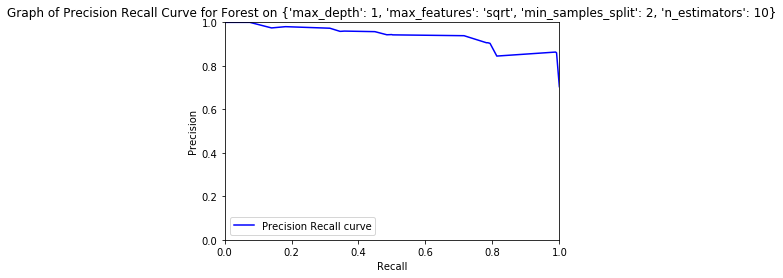

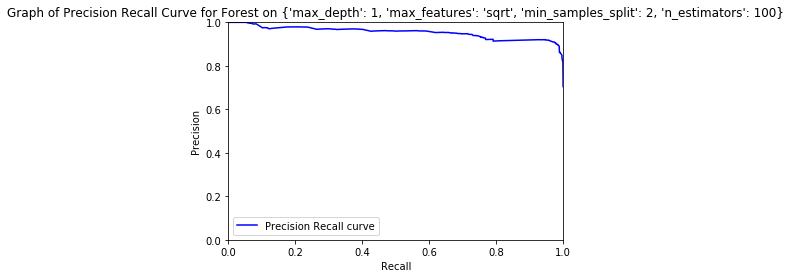

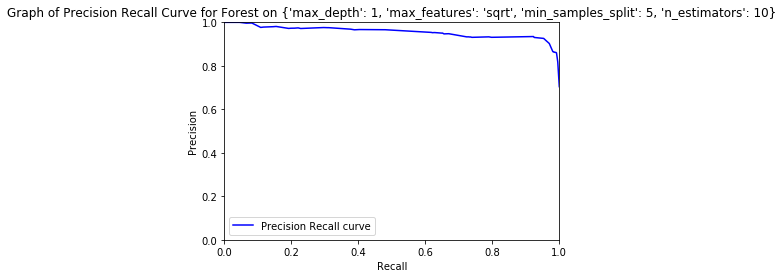

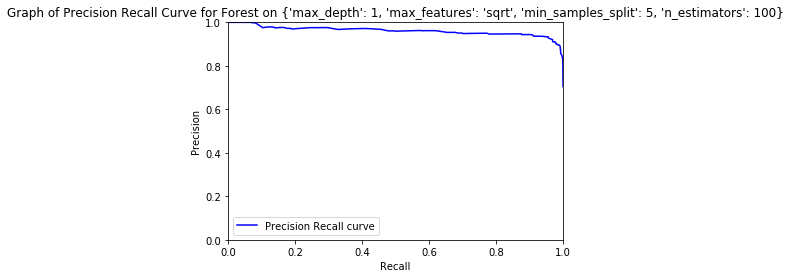

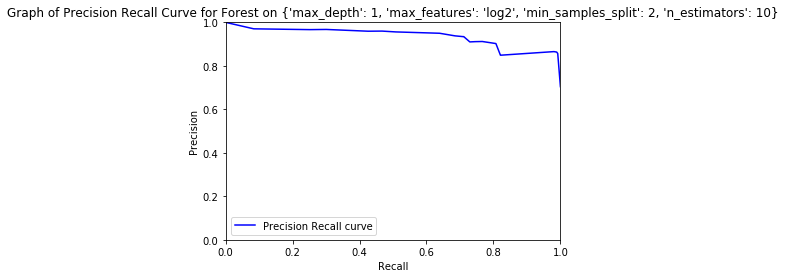

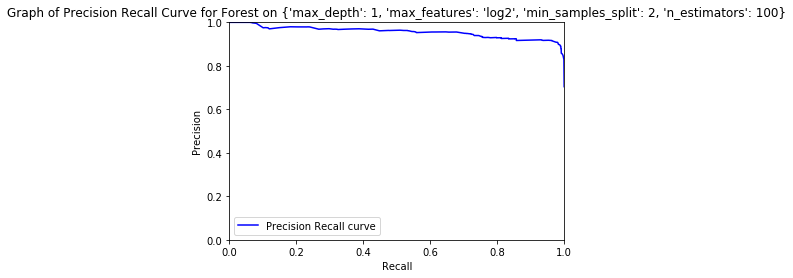

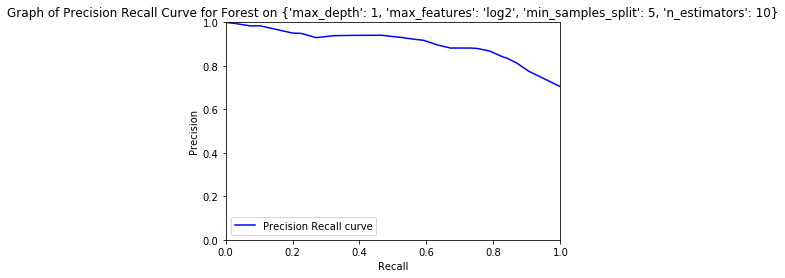

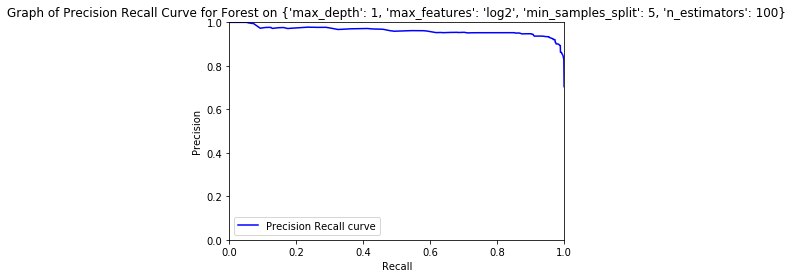

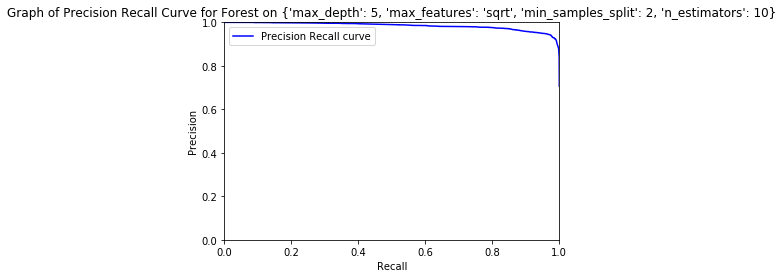

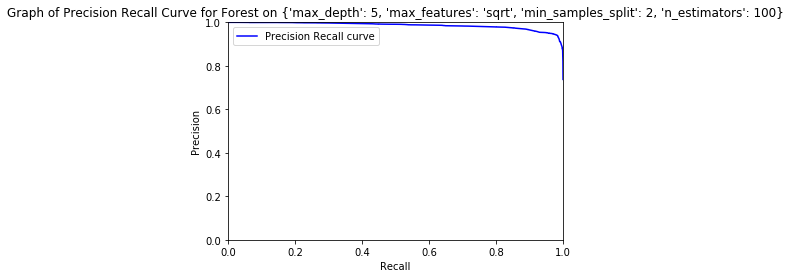

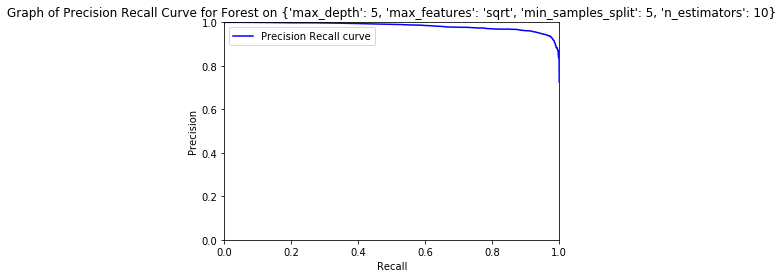

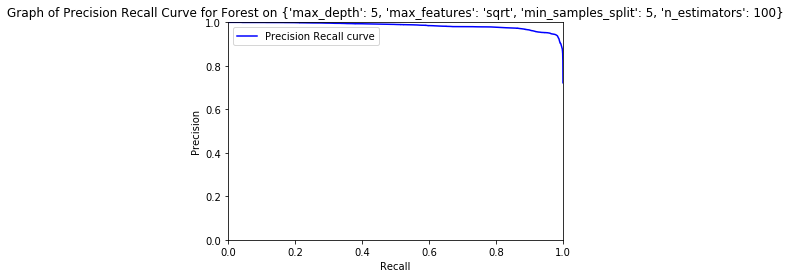

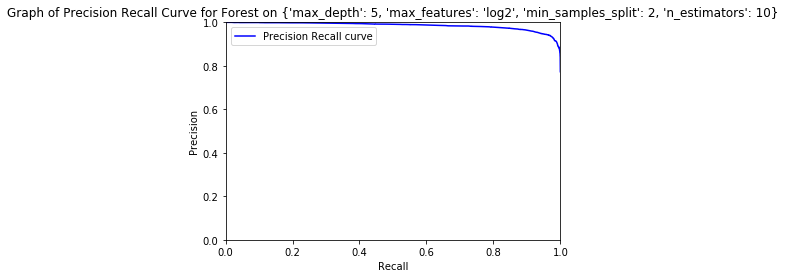

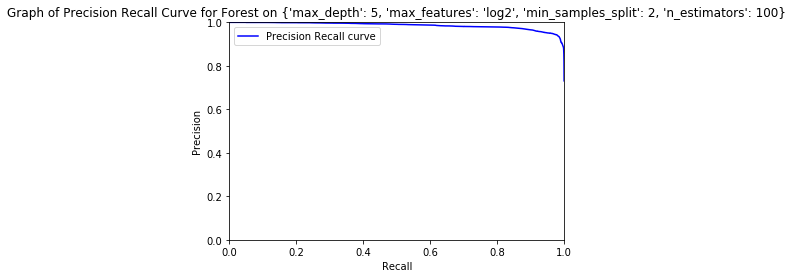

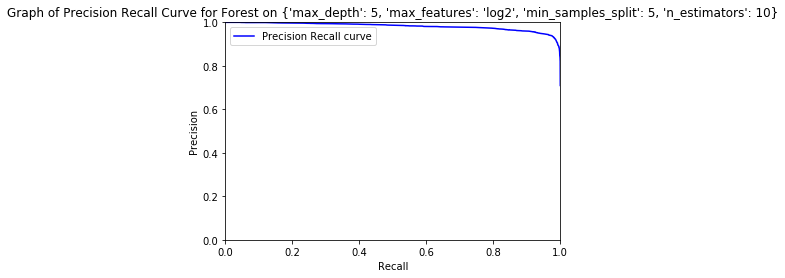

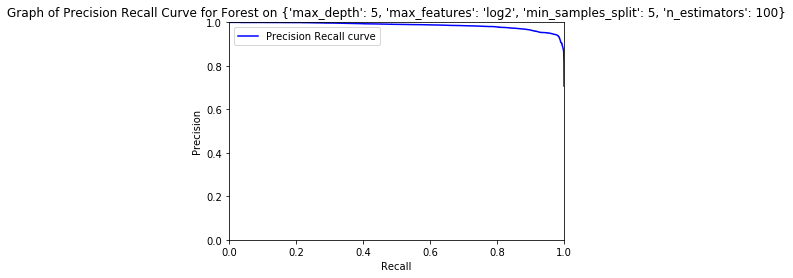

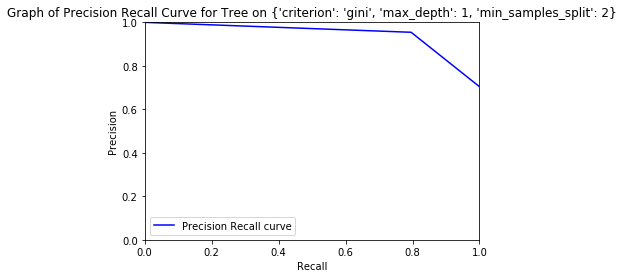

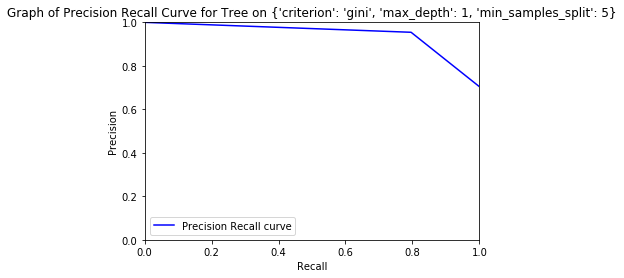

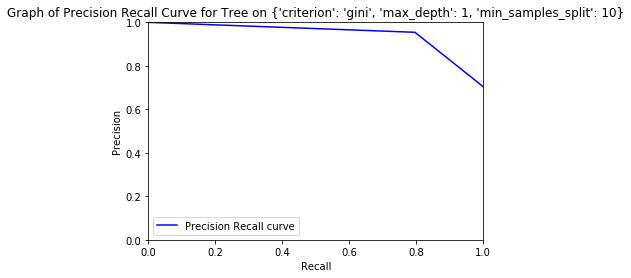

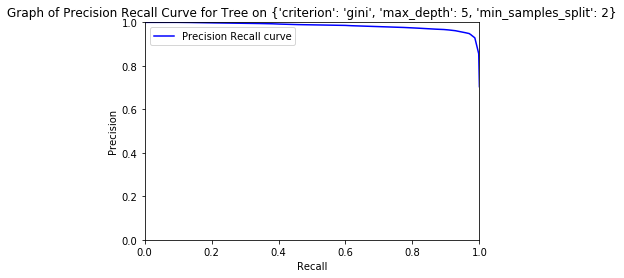

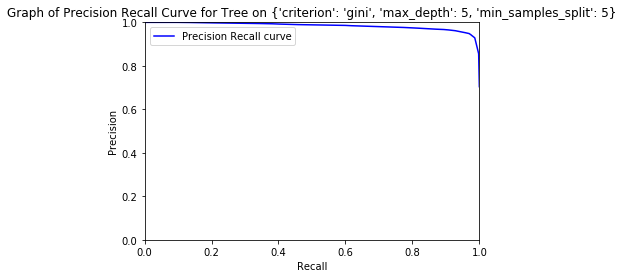

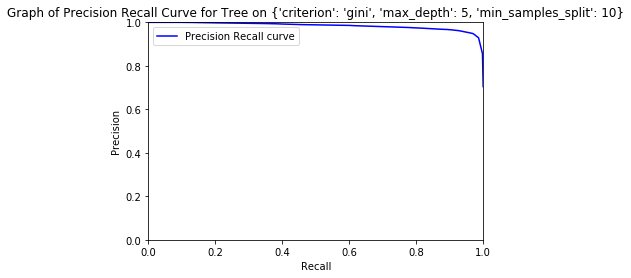

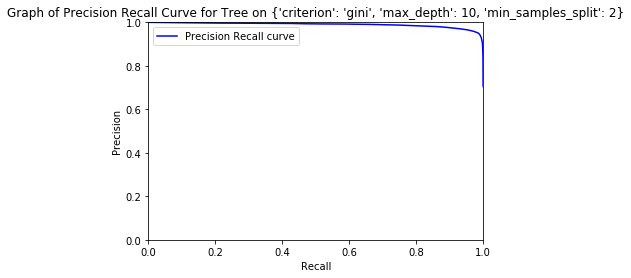

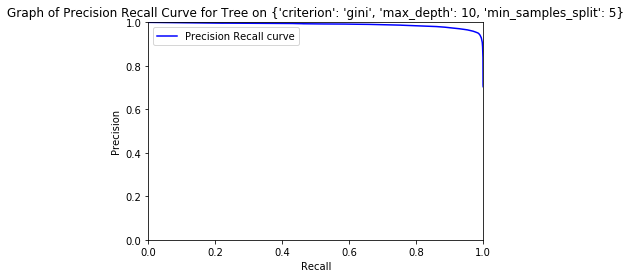

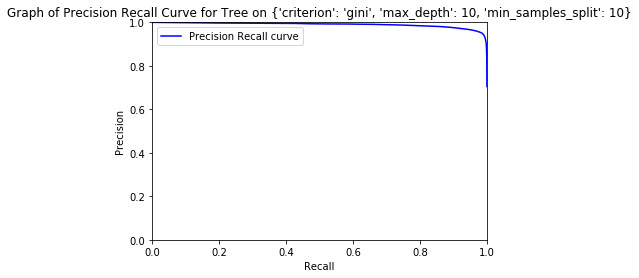

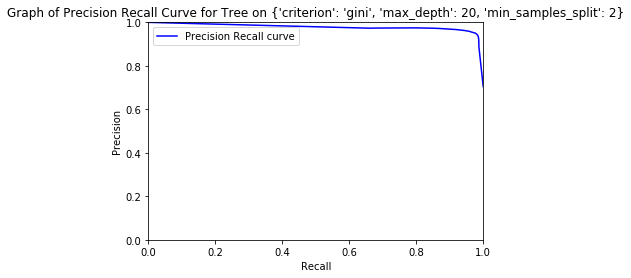

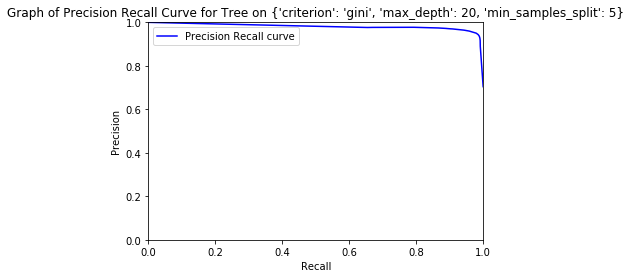

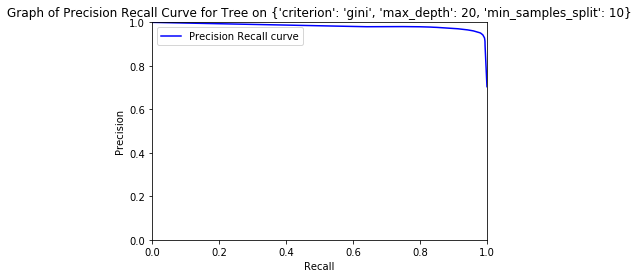

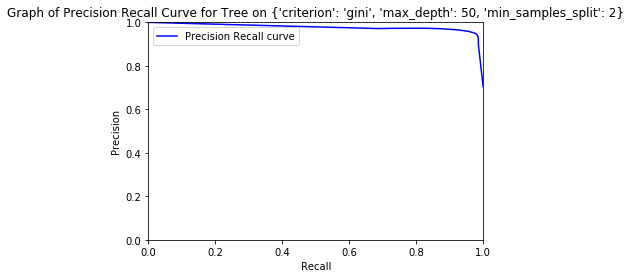

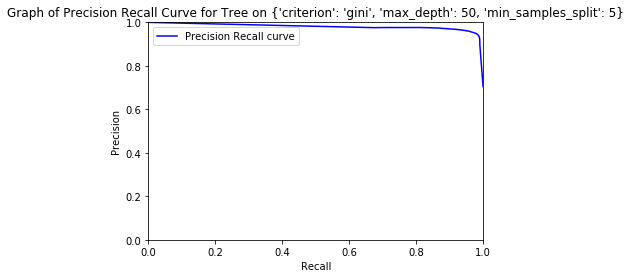

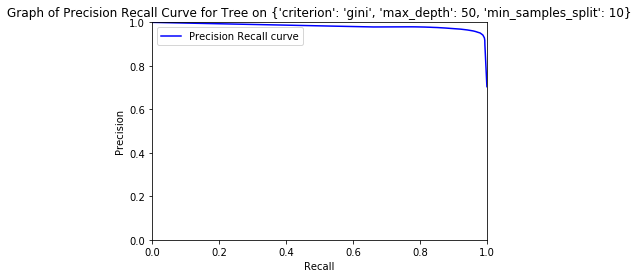

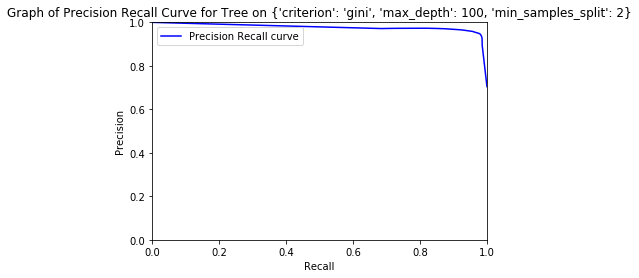

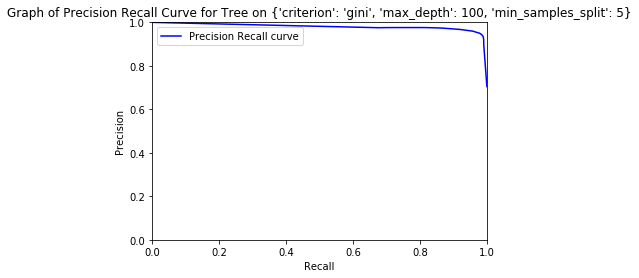

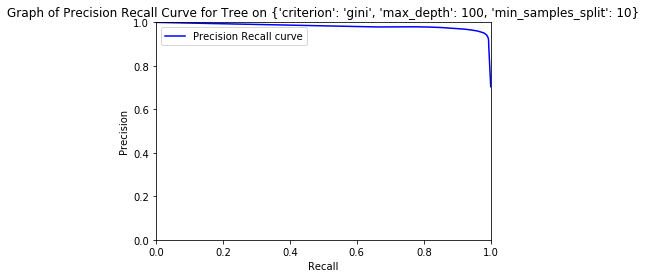

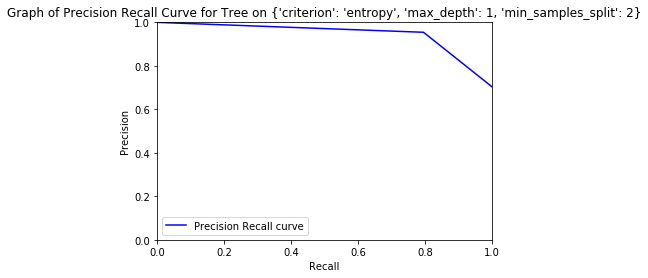

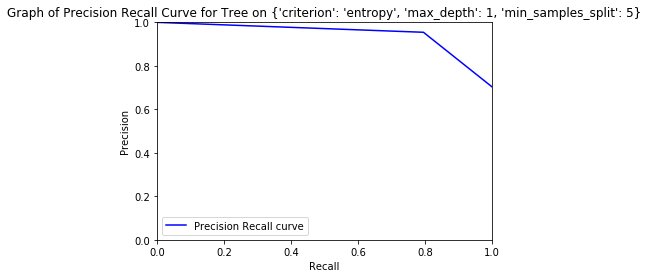

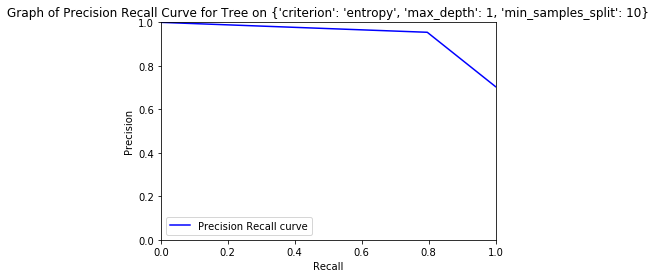

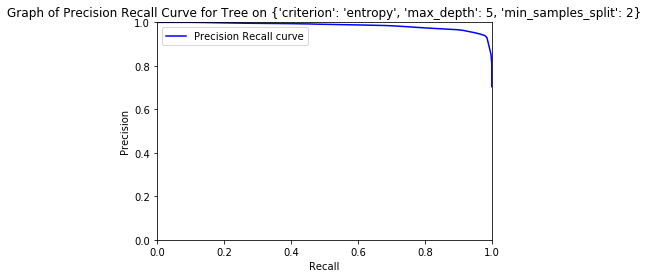

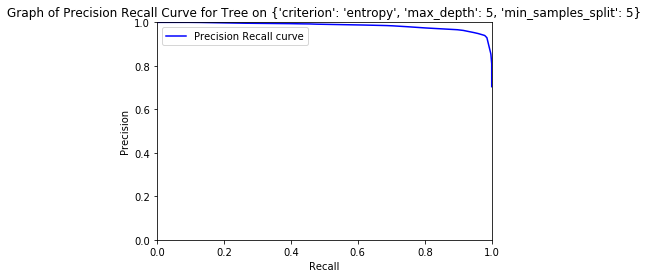

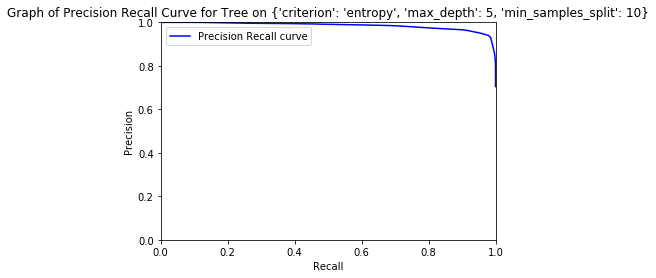

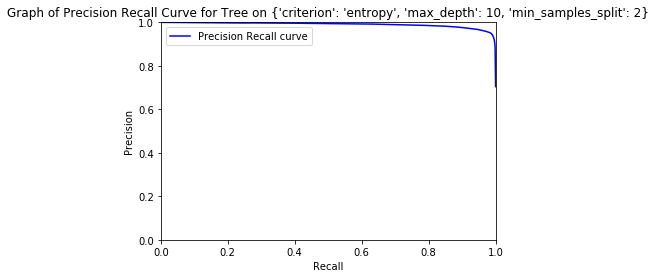

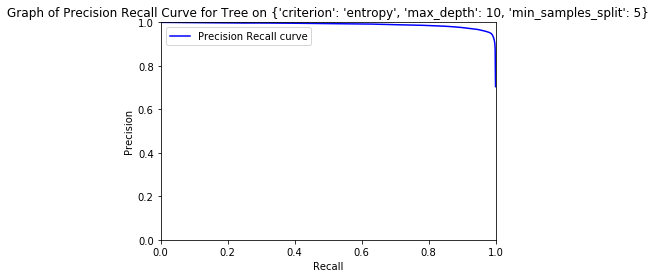

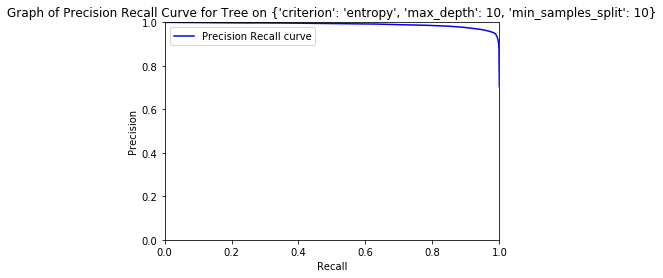

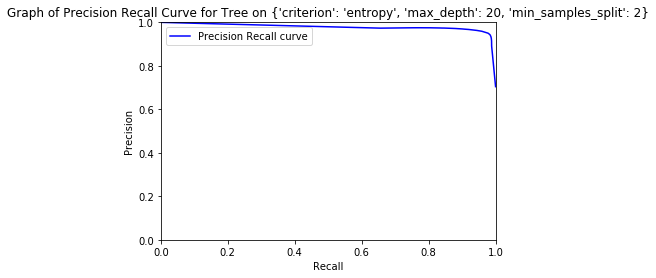

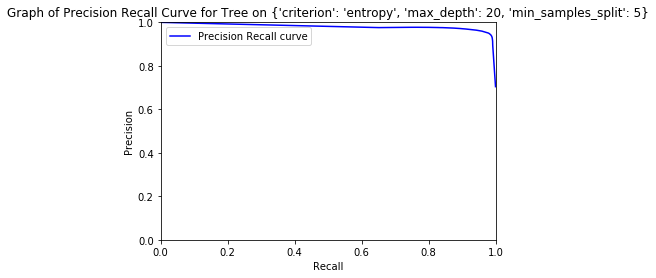

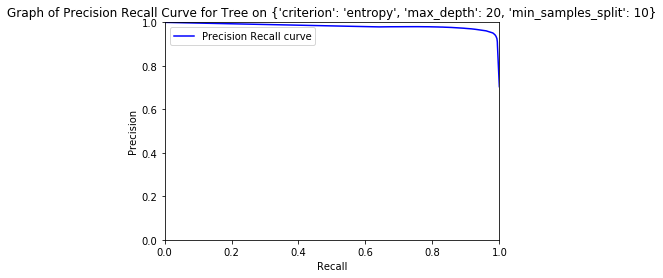

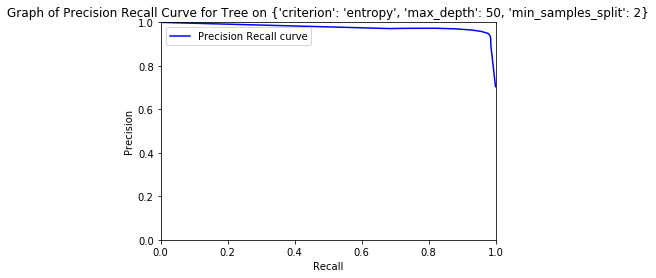

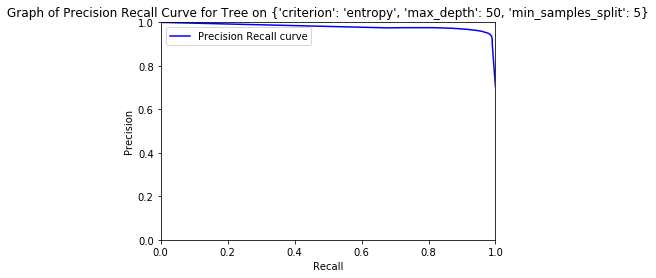

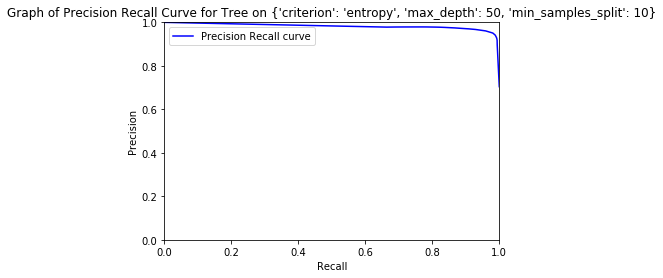

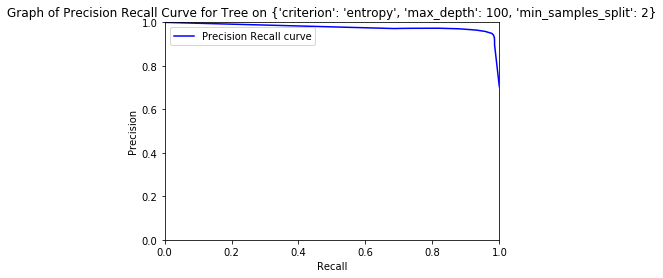

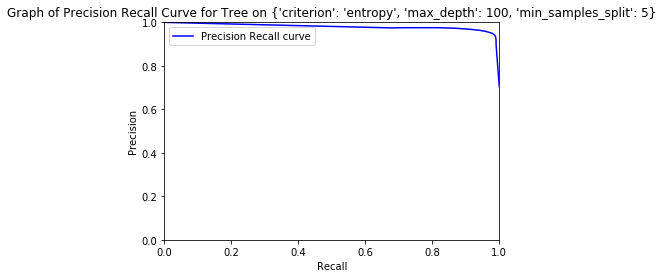

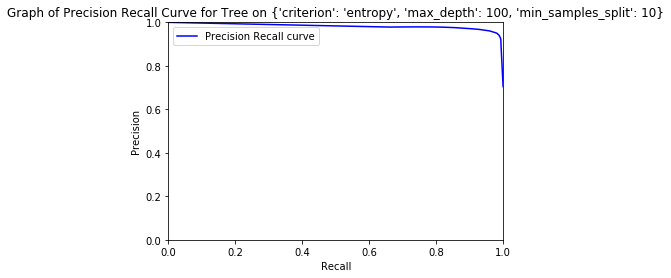

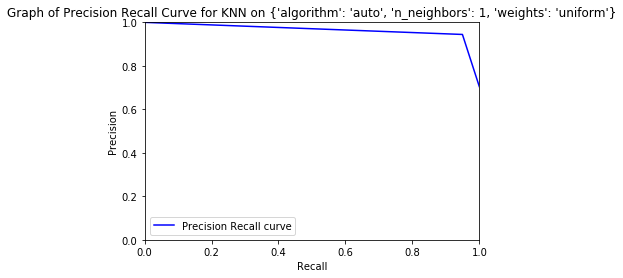

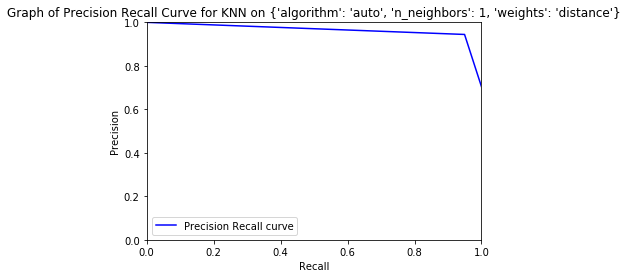

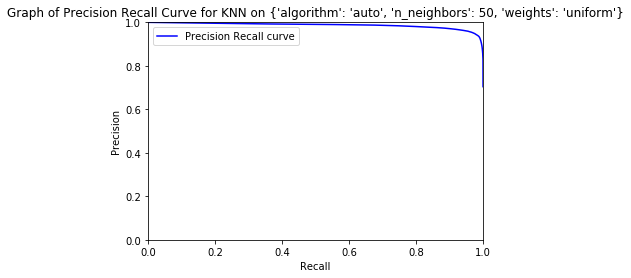

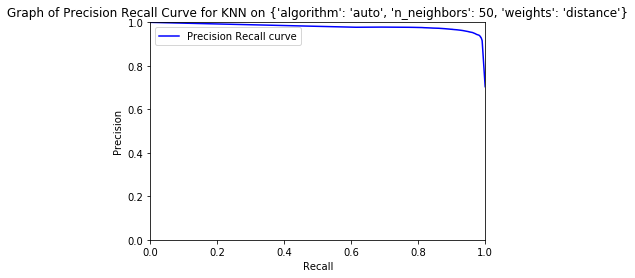

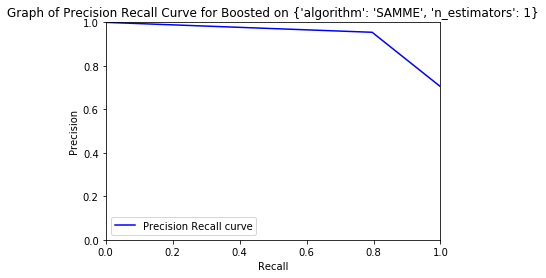

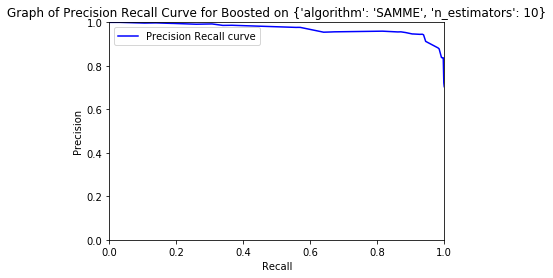

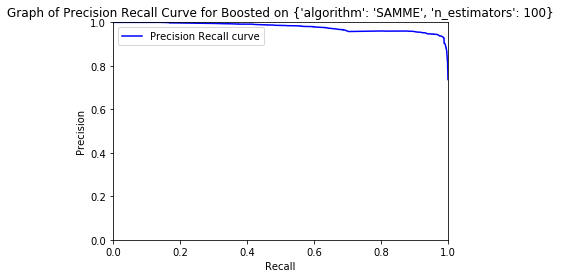

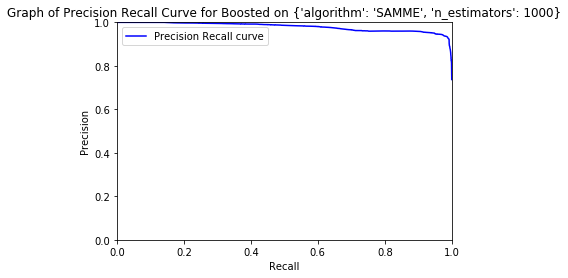

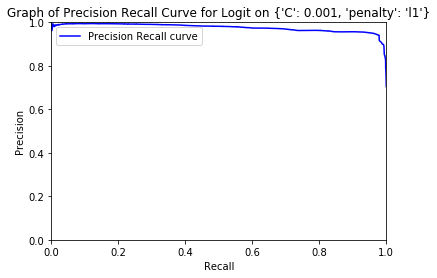

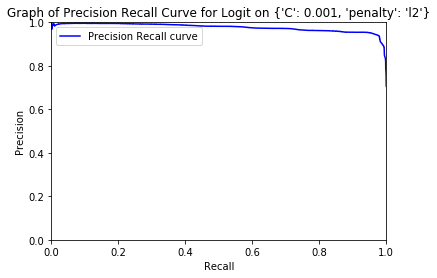

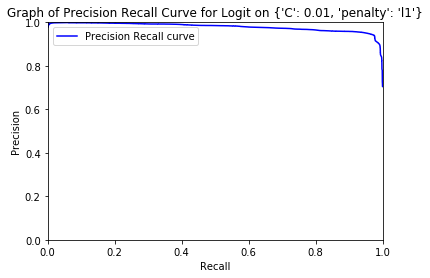

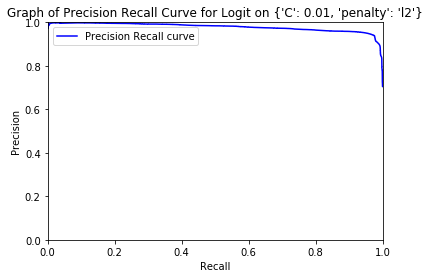

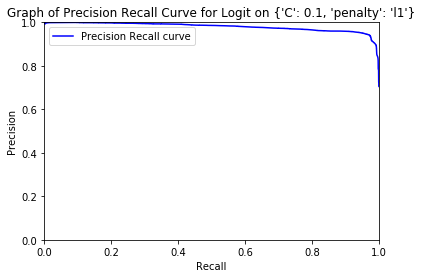

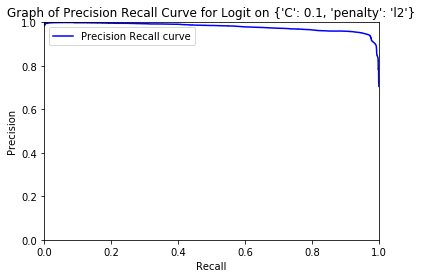

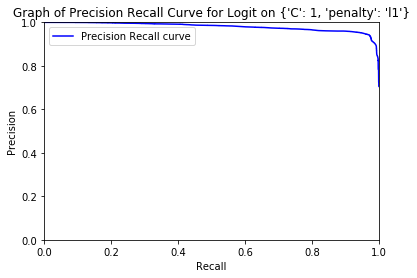

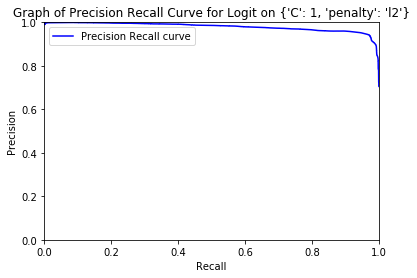

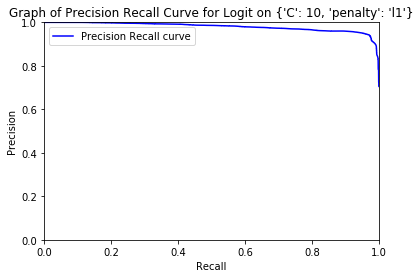

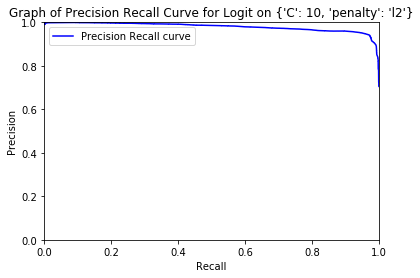

In [66]:
results_df = classifier_loop.clf_loop(main_df[subject_variables], main_df[dependent_variable], 'all', grid, classifiers)

In [67]:
processing.print_csv(results_df, r"C:\Users\User\AppData\Local\Programs\Python\Python36\results.csv")

CSV Created
